In [ ]:
!gdown 1gMlteYvpQxXEmwSDd-cEfqS-UmBT3Xxr

Downloading...
From: https://drive.google.com/uc?id=1gMlteYvpQxXEmwSDd-cEfqS-UmBT3Xxr
To: /content/test.csv
100% 7.93k/7.93k [00:00<00:00, 20.2MB/s]


In [ ]:
!gdown 14s2hyKKoVAy3xqR2pO2FQ9om8DYnPdC7

Downloading...
From: https://drive.google.com/uc?id=14s2hyKKoVAy3xqR2pO2FQ9om8DYnPdC7
To: /content/train.csv
100% 18.6k/18.6k [00:00<00:00, 33.4MB/s]


In [ ]:
#import machine learning library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc


In [ ]:
#create train
train = pd.read_csv('/content/train.csv')
x_train = train.drop(columns = ['Unnamed: 0', 'Outcome'])
y_train = train[['Outcome']]
#test
test = pd.read_csv('/content/test.csv')
x_test = test.drop(columns = ['Unnamed: 0', 'Outcome'])
y_test = test[['Outcome']]
#check
print('Size of x training:',len(x_train))
print('Size of y training:',len(y_train))
print('Size of x testing:',len(x_test))
print('Size of y testing:',len(y_test))
train.head()

Size of x training: 537
Size of y training: 537
Size of x testing: 231
Size of y testing: 231


,Unnamed: 0,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,334,95.0,121.50,23.9,0.260,22,0
1,139,105.0,127.25,36.9,0.159,28,0
2,485,135.0,127.25,42.3,0.365,24,1
3,547,131.0,127.25,33.1,0.160,28,0
4,18,103.0,121.50,43.3,0.183,33,0


**logistic regression**

In [ ]:
model_logistic = LogisticRegression() #<------------logis
model_logistic.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
#try predict on test set
y_pred = model_logistic.predict(x_test)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Ensure that the number of samples matches
assert x_train.shape[0] == y_train.shape[0], "Inconsistent sample size between x_train and y_train"
assert x_test.shape[0] == y_test.shape[0], "Inconsistent sample size between x_test and y_test"

# Now, you can proceed with model training and evaluation
model_logistic = LogisticRegression()
model_logistic.fit(x_test, y_test)
y_pred = model_logistic.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model_logistic.predict_proba(x_test)[:, 1])

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

x_train shape: (537, 5)
y_train shape: (537, 1)
x_test shape: (231, 5)
y_test shape: (231, 1)
Accuracy: 0.77
Precision: 0.71
Recall: 0.57
F1-Score: 0.63
AUC-ROC: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


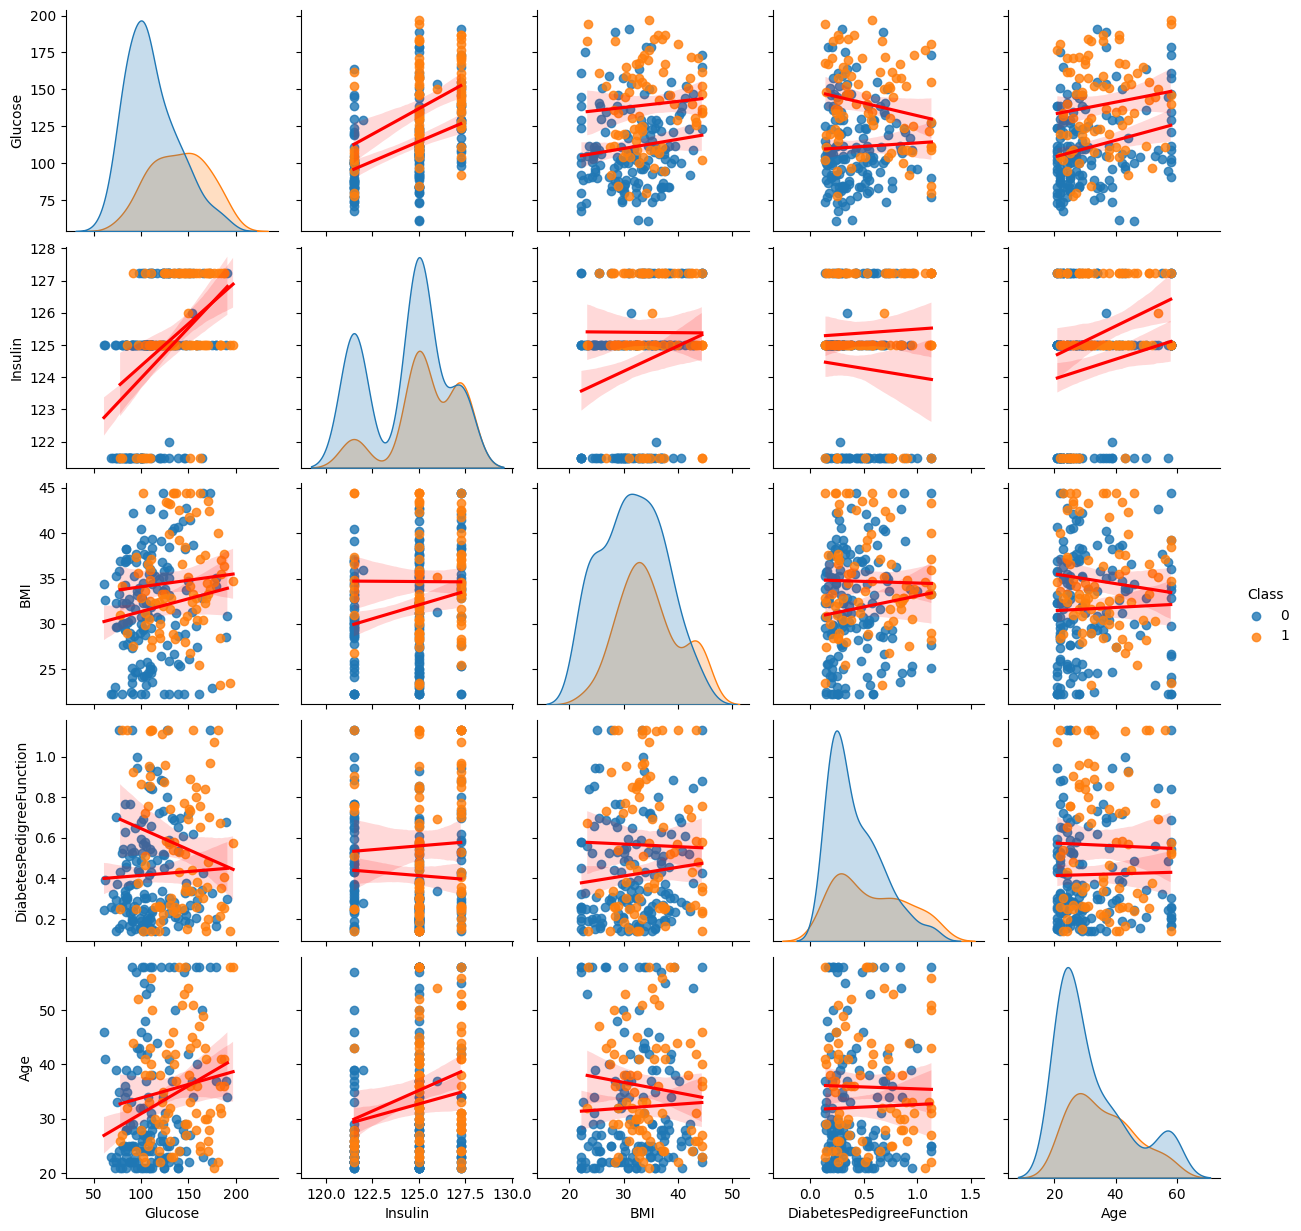

In [ ]:
# Create a pairplot with regression lines
sns.pairplot(df, hue="Class",kind = "reg", diag_kind="kde",plot_kws={'line_kws':{'color':'red'}})
# Display the plot
plt.show()


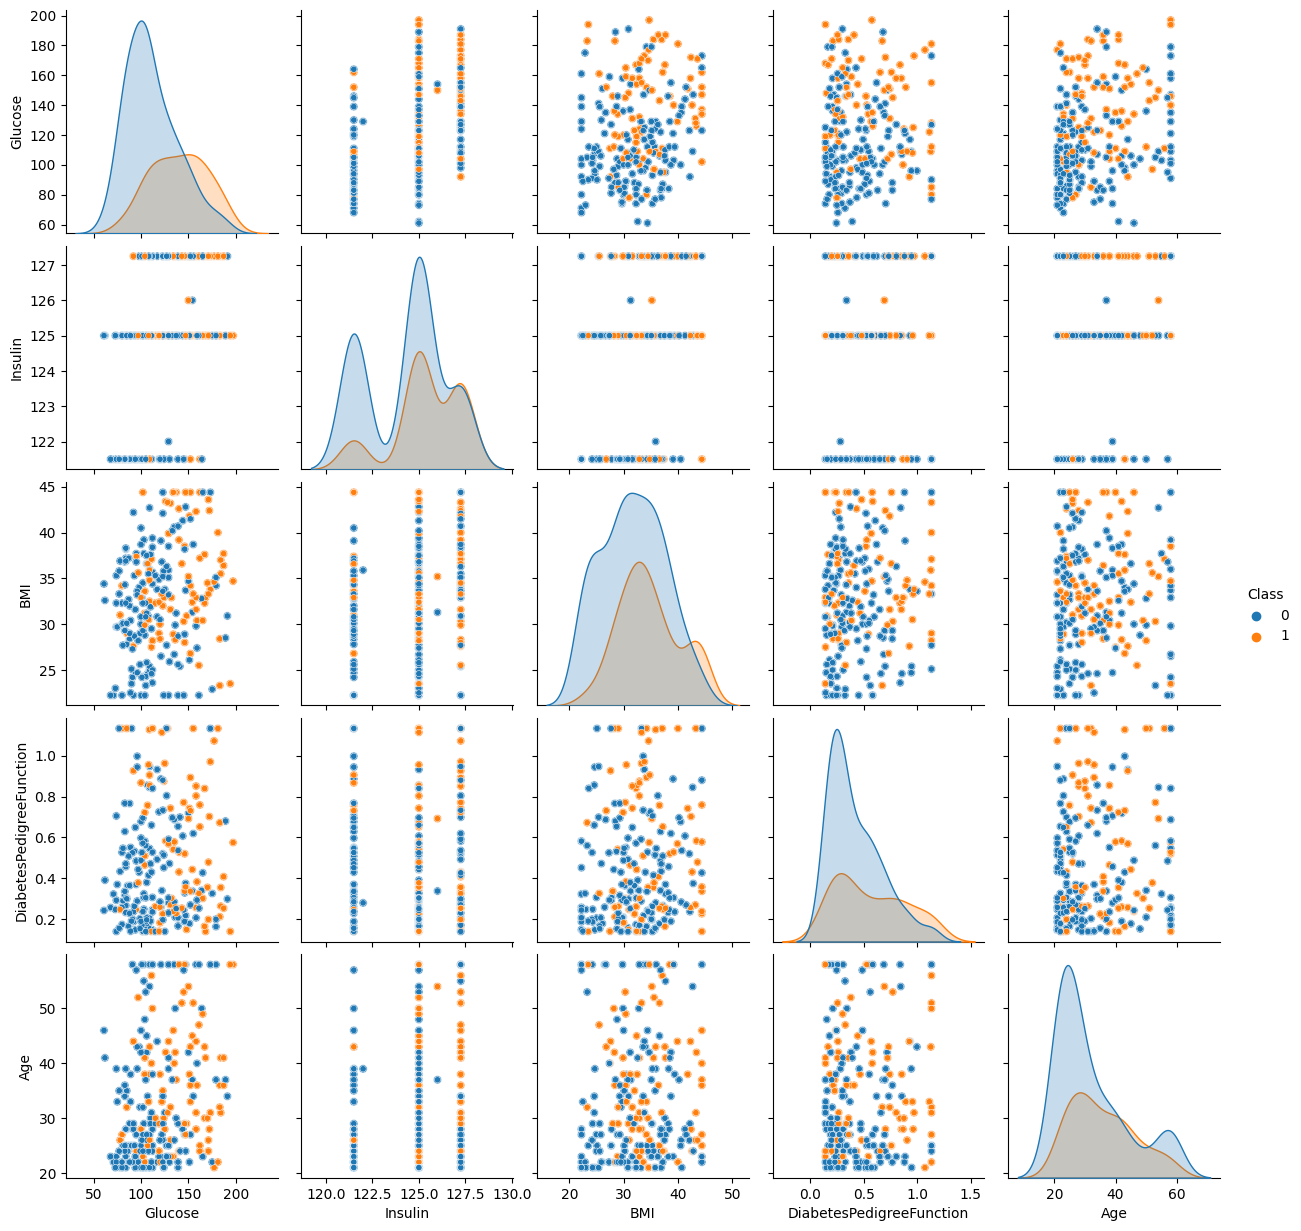

In [ ]:

pairplot = sns.pairplot(df, hue="Class", kind="scatter", diag_kind="kde")
pairplot.map_offdiag(sns.scatterplot, **{'s': 20, 'color': 'red'})

**KNN model.**

In [ ]:
x_train

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,95.0,121.50,23.900,0.26000,22
1,105.0,127.25,36.900,0.15900,28
2,135.0,127.25,42.300,0.36500,24
3,131.0,127.25,33.100,0.16000,28
4,103.0,121.50,43.300,0.18300,33
...,...,...,...,...,...
532,139.0,127.25,28.600,0.41100,26
533,96.0,125.00,22.400,0.20700,27
534,101.0,125.00,44.395,1.13285,38
535,141.0,125.00,42.400,0.20500,29


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN

KNeighborsClassifier(n_neighbors=3)

In [ ]:
KClassifier=KNN.fit(x_train,y_train.values.ravel())
prediction=KClassifier.predict(x_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       151
           1       0.59      0.61      0.60        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231

[[117  34]
 [ 31  49]]


In [ ]:
print("accuracy:",metrics.accuracy_score(y_test,prediction))

accuracy: 0.7186147186147186


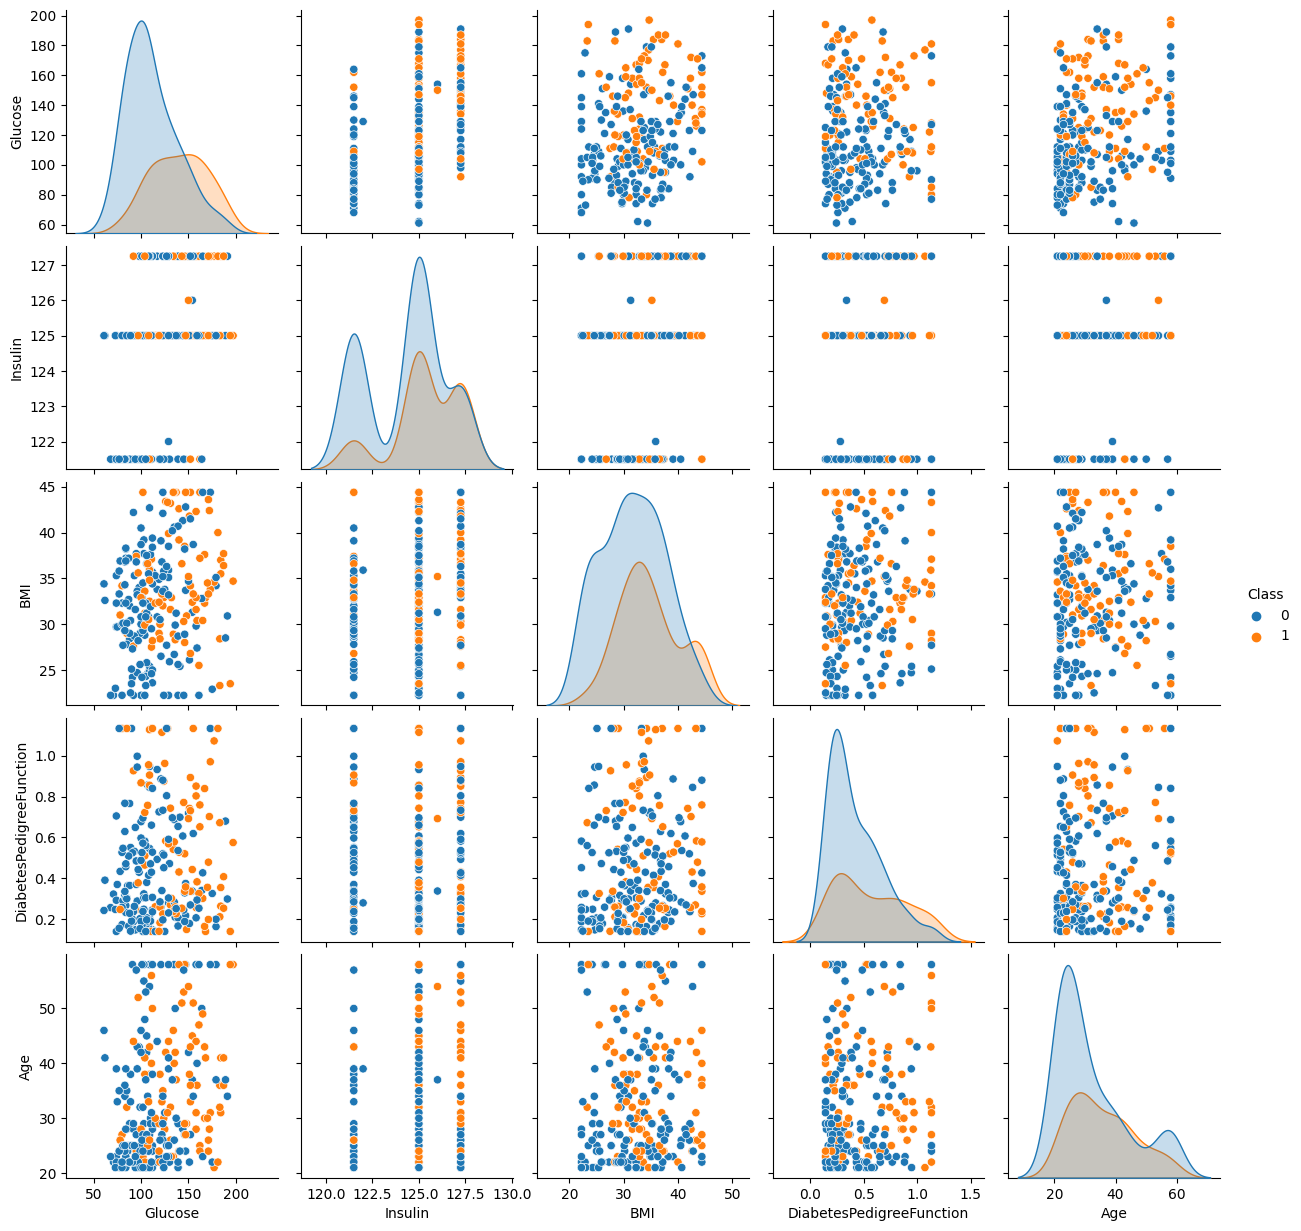

In [ ]:
df = pd.DataFrame(x_test, columns=['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
df["Class"] = y_test

# Create a pair plot with color-coded points by class
sns.pairplot(df, hue="Class")

plt.show()